# Bootstrap analysis of phenotypic data from HCP

In [203]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom hcp

Adding library niak to the search path.

Adding library psom to the search path.

Adding library hcp to the search path.



In [204]:
% Read pheno
[TAB,LABELS_X,LABELS_Y,LABELS_ID] = niak_read_csv('/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean_nonan_norm.csv');
nb_cluster = 5;   % # of clusters 
y=TAB;

We compute the spatial correlation matrix (across subjects) to see how the cluster structure looks.  

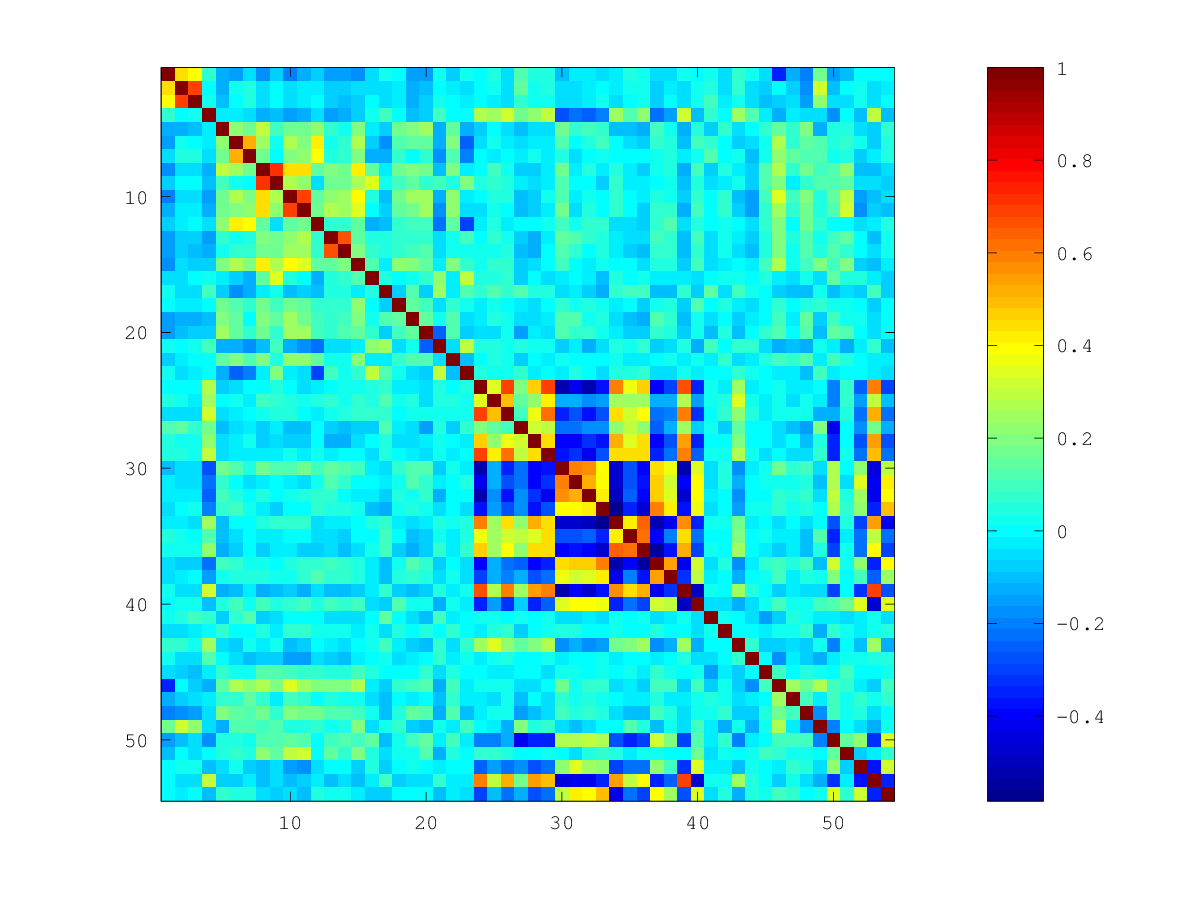

In [205]:
R = corr(y);
title('Spatial correlation matrix')
imagesc(R), axis square, colormap(jet), colorbar

the cluster structure is clear, but noisy. Let's run a hierarchical clustering and see if we can recover it. 

     Percentage done : 0 6 11 15 21 26 30 36 42 45 51 57 60 66 72 75 81 87 91 96 100 Done ! 


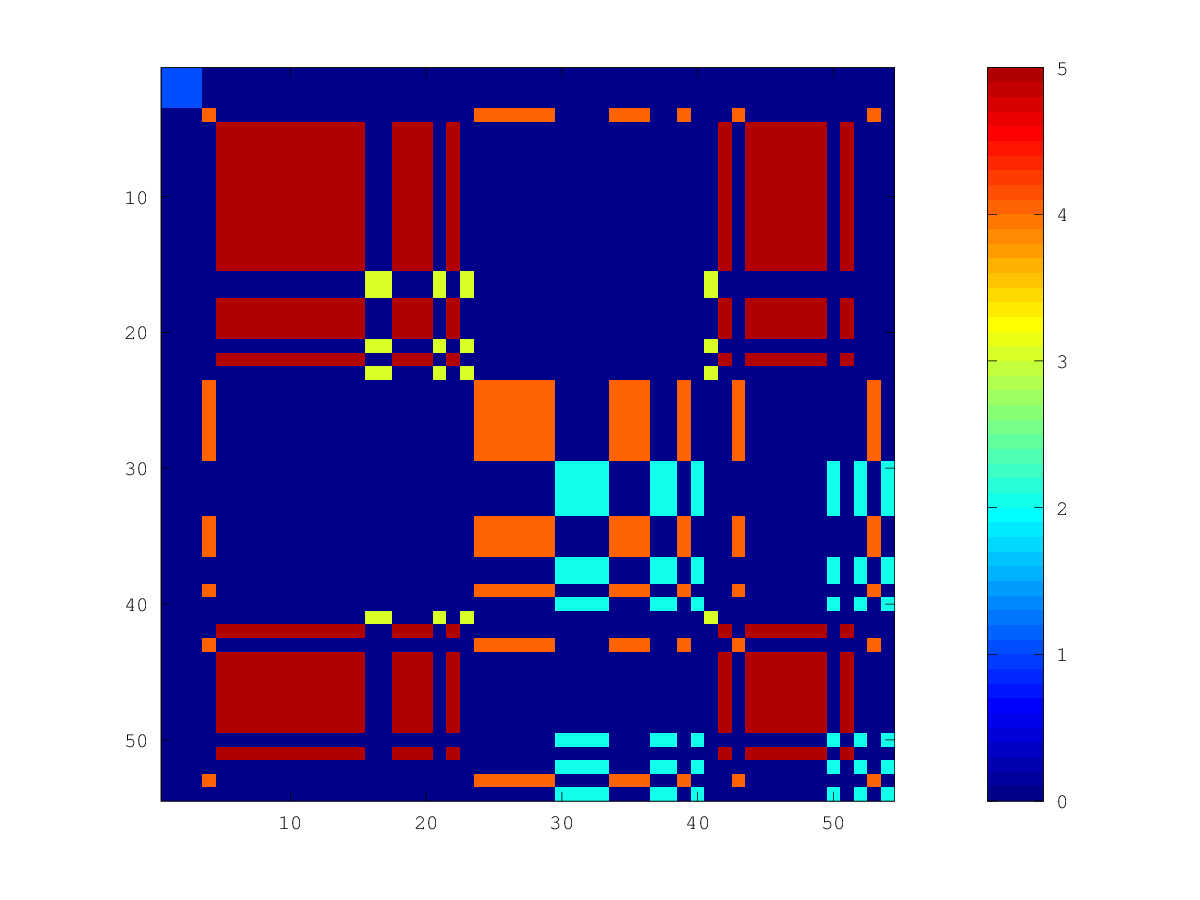

In [206]:
hier = niak_hierarchical_clustering(R); % The similarity-based hierarchical clustering
part = niak_threshold_hierarchy(hier,struct('thresh',nb_cluster)); % threshold the hierarchy to get 3 clusters
niak_visu_part(part) % visualize the partition

If the clustering had done a perfect job, we would have squares on the diagonal.let's odre it

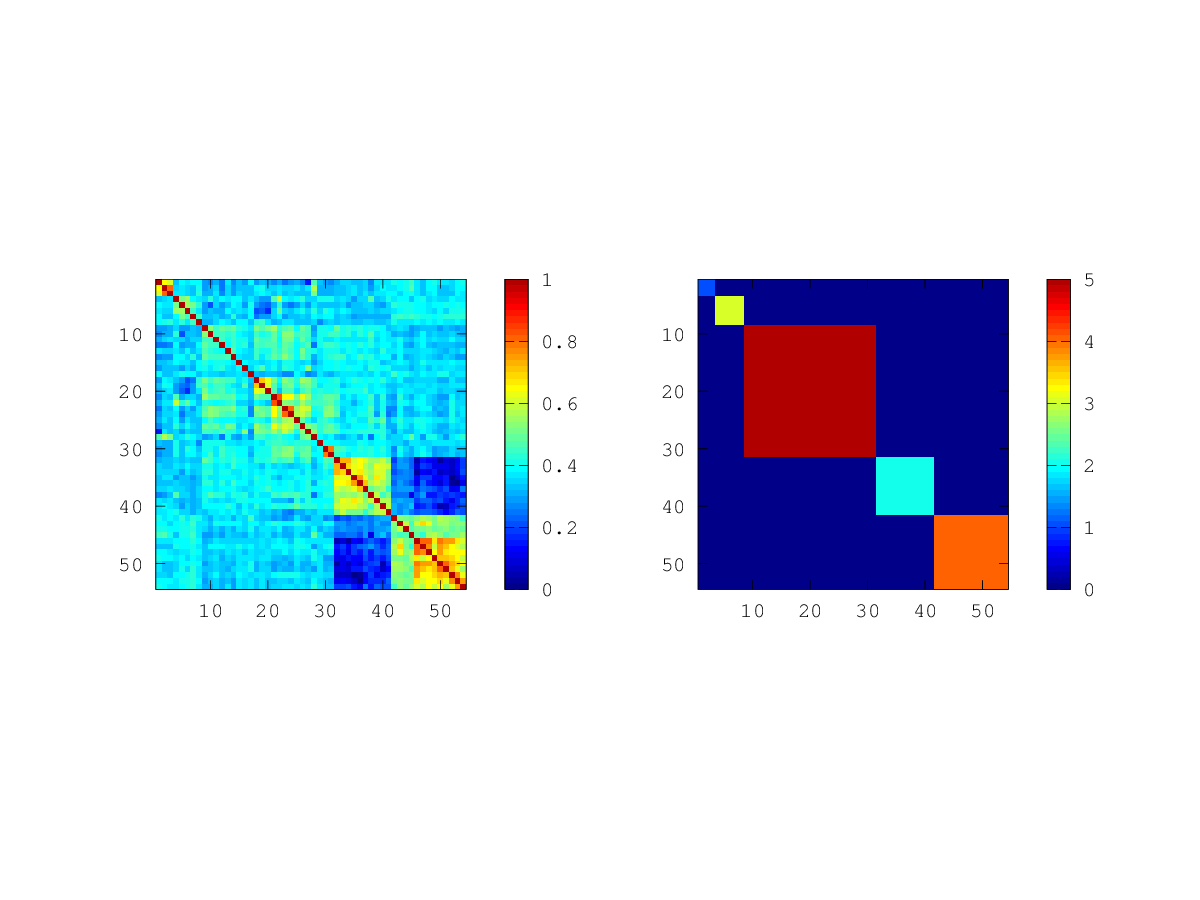

In [207]:
order = niak_hier2order(hier); % order the regions based on the hierarchy
subplot(1,2,1)
% Re-order the correlation matrix
title('re-ordered correlation matrix')
imagesc(R(order,order)), axis square, colorbar
subplot(1,2,2)
% Show the re-ordered partition
title('re-ordered partition')
niak_visu_part(part(order)), axis square

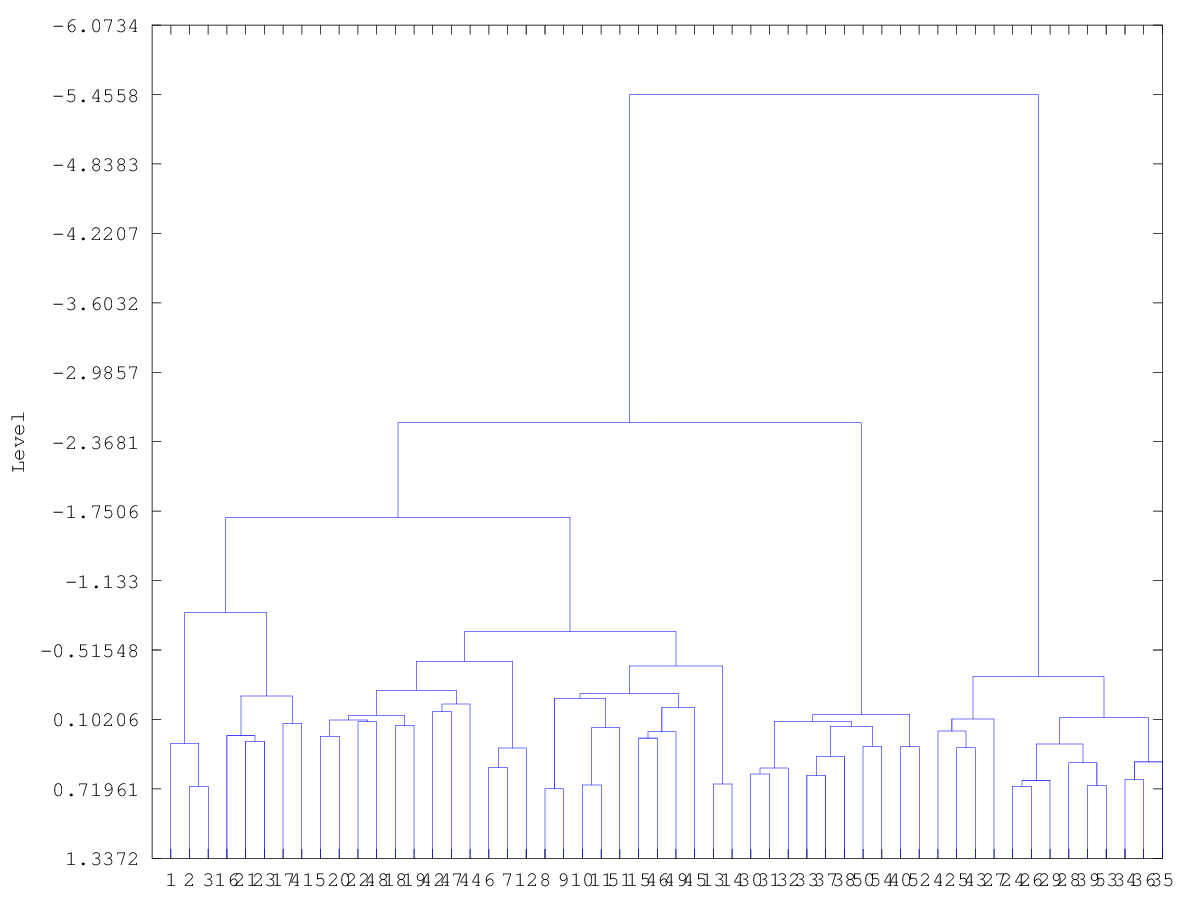

In [208]:
niak_visu_dendrogram(hier)

## boostrap analysis of stable clusters
 

In [209]:
nb_samp = 100;
opt_b.block_length = 1; % That's a parameter for the bootstrap. We treat the subjects as independent observations. 
for ss = 1:nb_samp
    niak_progress(ss,nb_samp)
    y_s = niak_bootstrap_tseries(y,opt_b); % Bootstrap the subjects
    R_s = corr(y_s); % compute the correlation matrix for the bootstrap sample
    hier = niak_hierarchical_clustering(R_s,struct('flag_verbose',false)); % replication the hierarchical clustering
    part = niak_threshold_hierarchy(hier,struct('thresh',nb_cluster)); % Cut the hierarchy to get clusters
    mat = niak_part2mat(part,true); % convert the partition into an adjacency matrix
    if ss == 1; stab = mat; else stab = stab+mat; end; % Add all adjacency matrices
end
stab = stab / nb_samp; % Divide by the number of replications to get the stability matrix

    Percentage done: 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100


Let's have a look at the stability matrix:

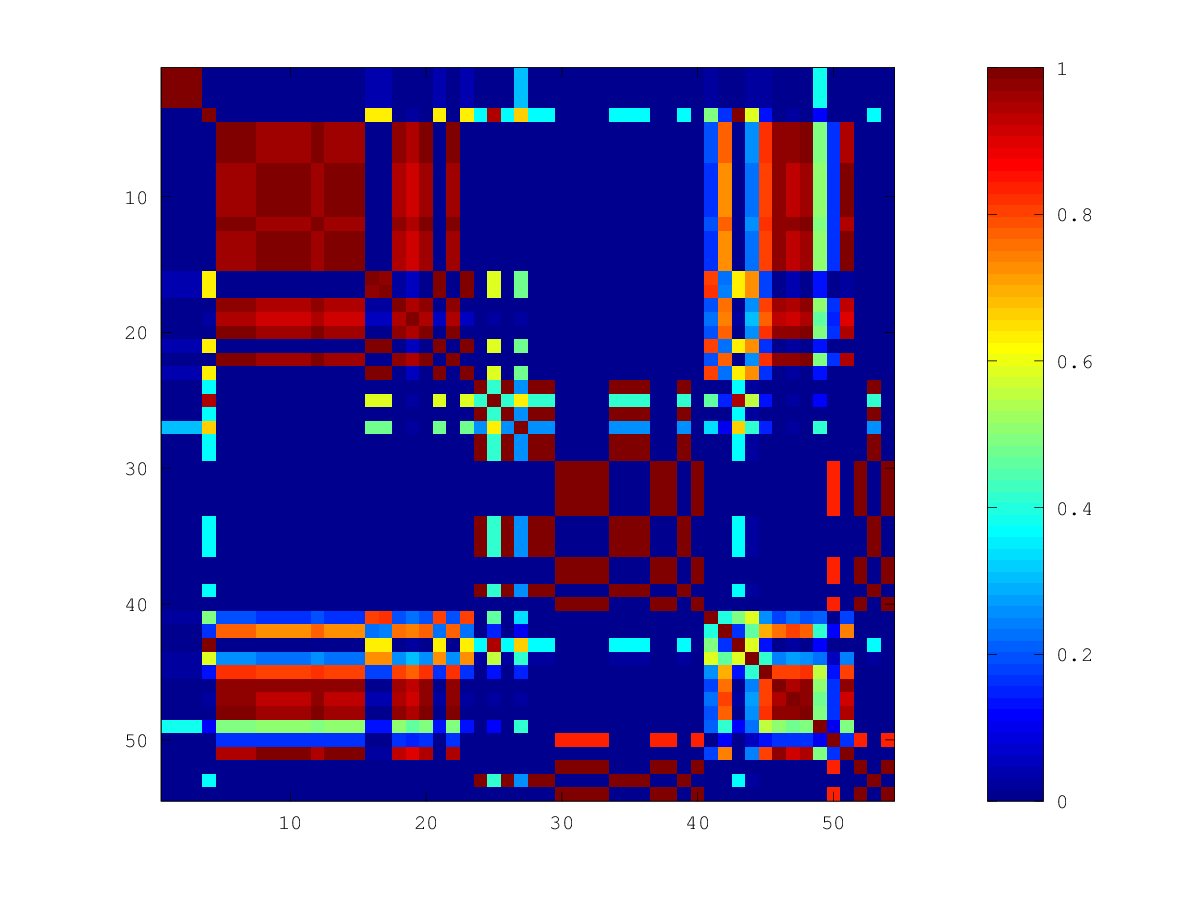

In [210]:
imagesc(stab), axis square, colormap(jet), colorbar

     Percentage done : 0 6 11 15 21 26 30 36 42 45 51 57 60 66 72 75 81 87 91 96 100 Done ! 


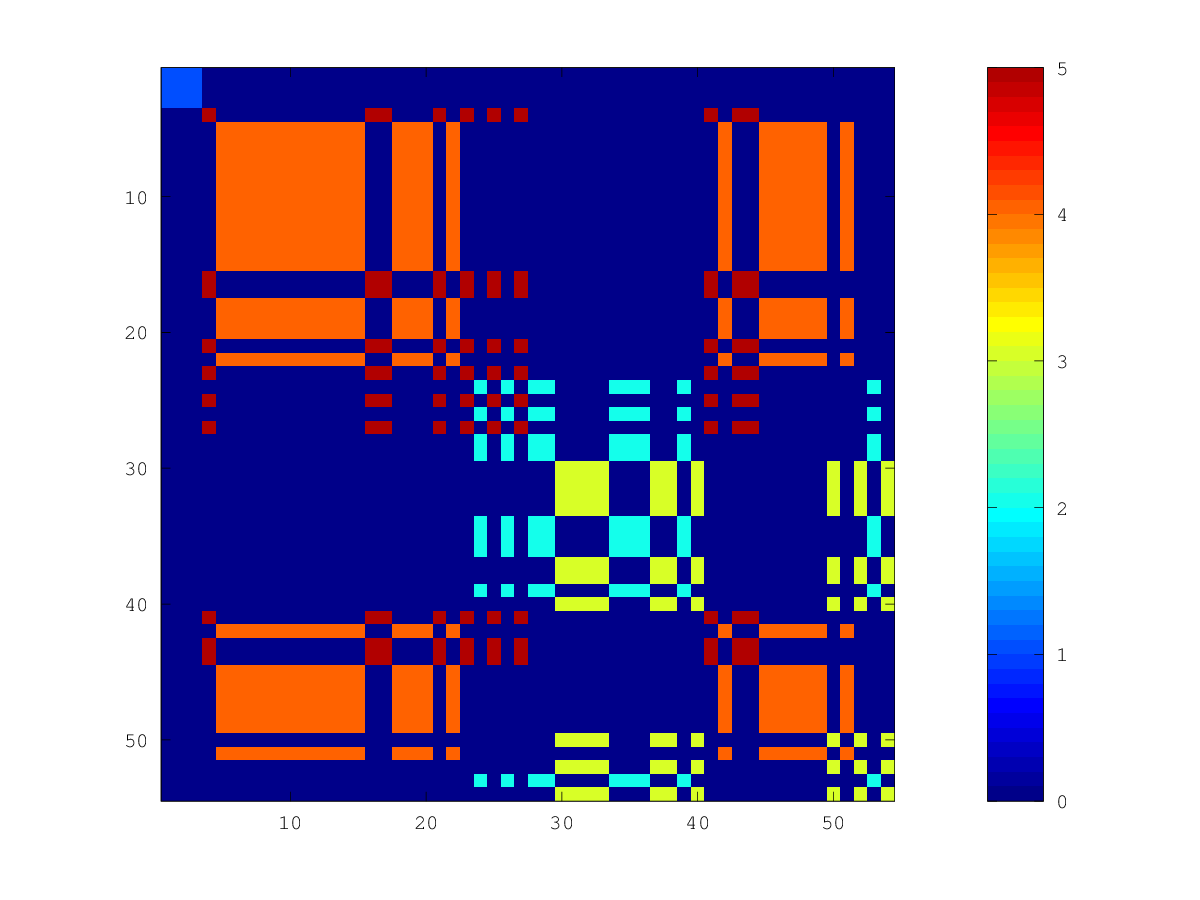

In [211]:
hier_consensus = niak_hierarchical_clustering(stab); % run a hierarchical clustering on the stability matrix
part_consensus = niak_threshold_hierarchy(hier_consensus,struct('thresh',nb_cluster)); % cut the consensus hierarchy
niak_visu_part(part_consensus), axis square, colormap(jet) % visualize the consensus partition

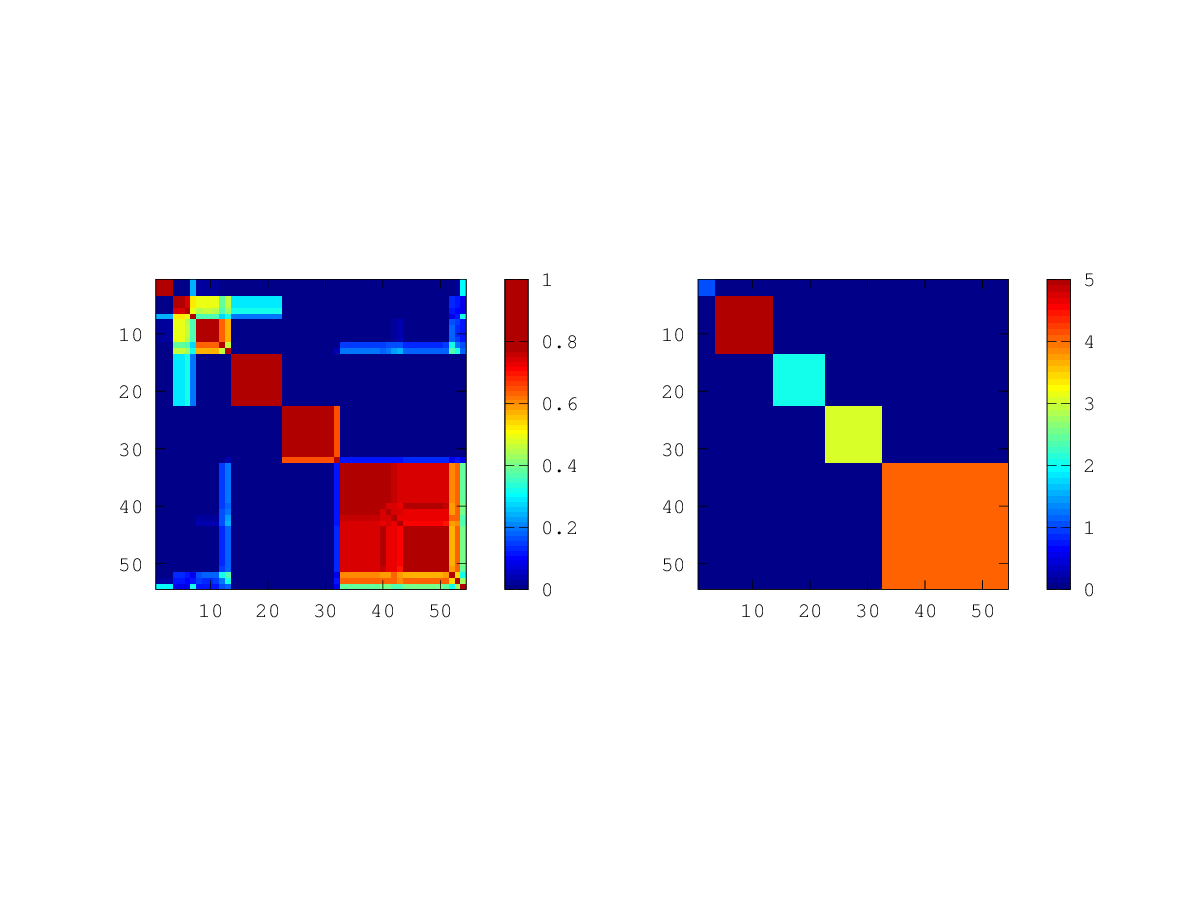

In [212]:
order_consensus = niak_hier2order(hier_consensus); % order the regions based on the hierarchy
subplot(1,2,1)
% Re-order the correlation matrix
title('re-ordered consensus matrix')
imagesc(stab(order_consensus,order_consensus)), axis square, colorbar
subplot(1,2,2)
% Show the re-ordered partition
title('re-ordered partition')
niak_visu_part(part_consensus(order_consensus)), axis square

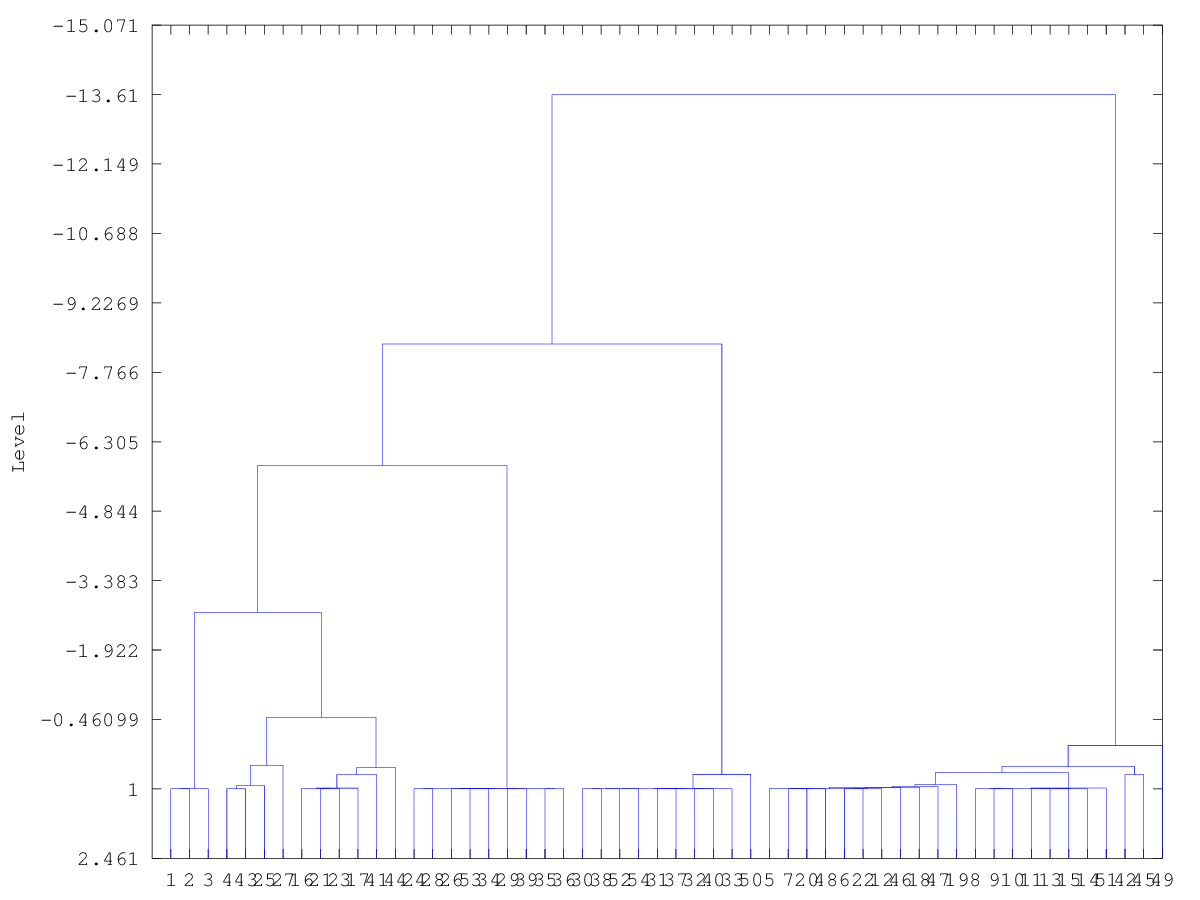

In [213]:
niak_visu_dendrogram(hier_consensus)

In [214]:
% calculate the mean cluster and save it
stack = [];
for ii = 1:nb_cluster
    fprintf('Cluster %i: \n',ii);
    label_y{ii} = sprintf('cluster_%i',ii);
    mask = zeros(size(part_consensus));
    mask = part_consensus == ii;
    mean_clust = mean(y(:,mask),2);
    stack = [stack mean_clust];
    labels_pheno = LABELS_Y(mask);
    for ss = 1:size(labels_pheno)(1)
        fprintf('     %s \n',labels_pheno{ss})
    end
end
% save clustred pheno to csv
opt.labels_y = label_y;
opt.labels_x  = LABELS_X;
opt.labels_id = 'Subject';
niak_write_csv('/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm.csv',...
stack,opt);

Cluster 1: 
     BMI 
     BPSystolic 
     BPDiastolic 
Cluster 2: 
     Sadness_Unadj 
     FearAffect_Unadj 
     AngHostil_Unadj 
     AngAffect_Unadj 
     Loneliness_Unadj 
     PercHostil_Unadj 
     PercReject_Unadj 
     PercStress_Unadj 
     NEOFAC_N 
Cluster 3: 
     LifeSatisf_Unadj 
     MeanPurp_Unadj 
     PosAffect_Unadj 
     Friendship_Unadj 
     EmotSupp_Unadj 
     InstruSupp_Unadj 
     SelfEff_Unadj 
     NEOFAC_A 
     NEOFAC_C 
     NEOFAC_E 
Cluster 4: 
     PicSeq_Unadj 
     CardSort_Unadj 
     Flanker_Unadj 
     PMAT24_A_CR 
     PMAT24_A_RTCR 
     ReadEng_Unadj 
     PicVocab_Unadj 
     ProcSpeed_Unadj 
     DDisc_AUC_200 
     DDisc_AUC_40K 
     VSPLOT_TC 
     SCPT_SEN 
     SCPT_SPEC 
     IWRD_TOT 
     ER40_CR 
     Odor_Unadj 
     Mars_Final 
     Endurance_Unadj 
     GaitSpeed_Comp 
     Dexterity_Unadj 
     Strength_Unadj 
     NEOFAC_O 
Cluster 5: 
     PSQI_Score 
     VSPLOT_CRTE 
     SCPT_TPRT 
     IWRD_RTC 
     ER40_CRT 
     FearS

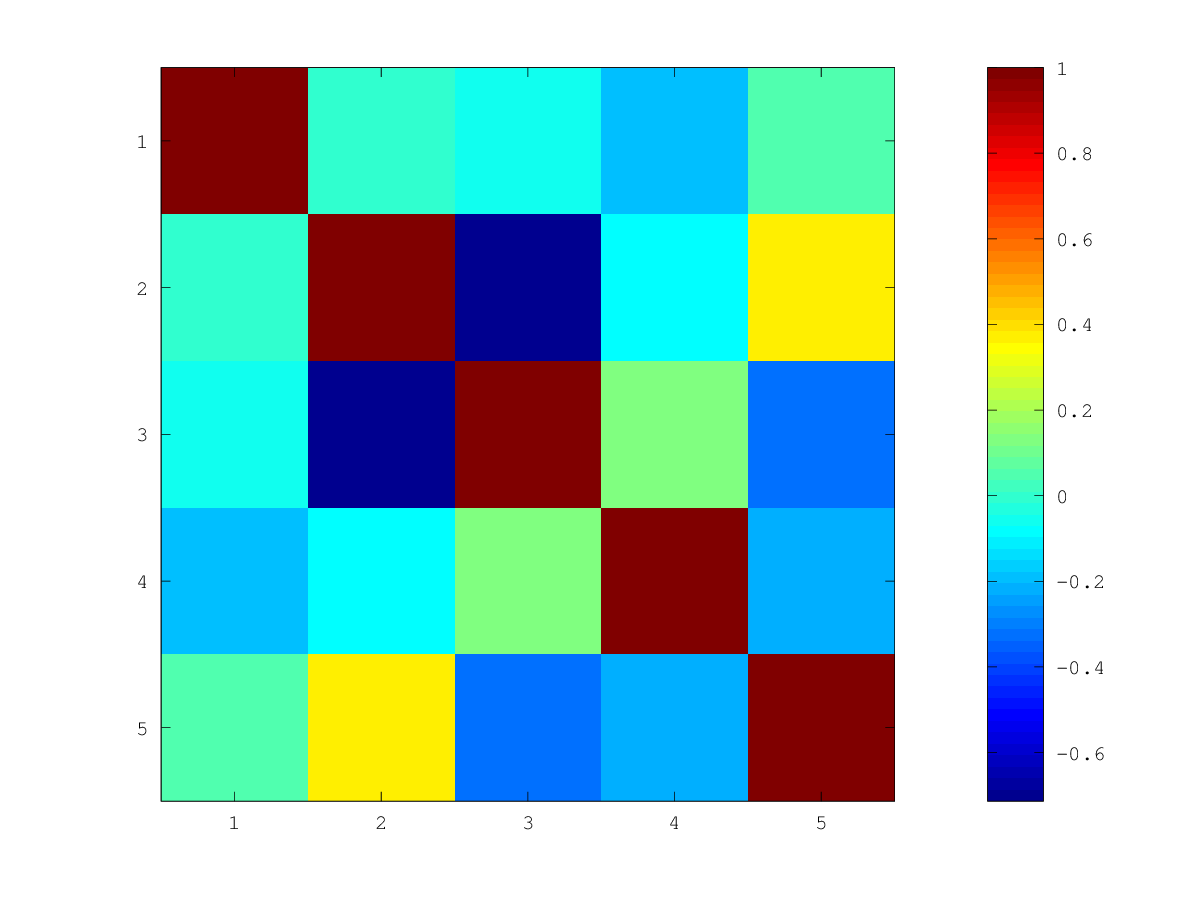

In [215]:
R = corr(stack);
title('Spatial correlation matrix of clustered pheno')
imagesc(R), axis square, colormap(jet), colorbar

In [172]:
R

R =

   1.0000000  -0.0030789  -0.7131616  -0.0915891   0.3761906
  -0.0030789   1.0000000  -0.0636010  -0.1894693   0.0550398
  -0.7131616  -0.0636010   1.0000000   0.1384974  -0.3288656
  -0.0915891  -0.1894693   0.1384974   1.0000000  -0.2116375
   0.3761906   0.0550398  -0.3288656  -0.2116375   1.0000000

